# __Support Vector Machine - SVM__
---
En esta demostración haremos uso de una SVM para construir y entrenar un modelo usando ejemplos proporcionados por humanos
y ejemplos para ya sea predecir que ejemplos son malignos o benignos.


Haremos uso de un dataset llamado __Cancer.csv__ del repositorio de [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29).


En el dataset definiremos el valor y estado de cáncer se la siguiente forma.
- Class 2 = mild state
- Class 4 = evil state

## __¿Cómo usar una SVM?__

Las SVM son usadas como técnicas de clasificación las cuales primero buscan encontrar el hiperplano que puede separar objetos de diferentes clases y entonces deja un máximo margen de puntos anidados de cada clase para la separación del hiperplano.

## __Importando librerías__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## __Cargamos el dataset__

Lo primero que haremos será cargar el [dataset](./dataset/cancer.csv) que hemos descargado anteriormente y listamos los ejemplos de las primeras 5 filas de la siguiente forma.

In [4]:
df = pd.read_csv("./dataset/cancer.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## __Analizamos las filas y columnas del dataset__

Analizamos la estructura de nuestro dataset obteniendo los siguientes datos:

- Cantidad de filas y columnas.

- Cantidad de Celdas(Fila * Columna)

- Cantidad de filas con ejemplos por columna.

- Valores repetidos por columna.

In [5]:
print("Cant. filas y columnas: ", df.shape)
print()

print("Cant. de celdas: ", df.size)
print()

print("Cant. de filas por columna")
print(df.count())
print()

print("Valores repetidos por columna")
print(df['Class'].value_counts())

Cant. filas y columnas:  (699, 11)



## __Declarando etiquetas__

Procedemos a mostrar los tipos de cancer y estraer la cantidad de veces que se repiten los cuales, se dividen de la siguiente forma:

- Class 2(Benign) con 458 ejemplos.

- Class 4(Malignant) con 241 ejemplos.

Lo que haremos ahora será construir un modelo usando estos ejemplos.

In [6]:
benign = df[df['Class'] == 2]
malignant = df[df['Class'] == 4]

## __Graficamos los datos__

Ya habiendo extraido los datos del dataset, vamos a colocar nuestras etiquetas en un gráfico.

Para ello, usaremos la función plot() y agregaremos los siguientes atributos:

- kind: Tipo de gráfico.

- x: Eje vertical

- y: Eje horizontal

- color: Color representativo de los datos.

- label: Título del gráfico

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

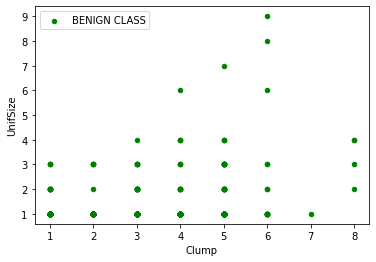

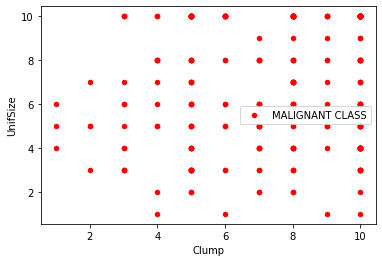

In [7]:
benign.plot(
    kind='scatter',
    x="Clump",
    y="UnifSize",
    color='green',
    label="BENIGN CLASS"
)

malignant.plot(
    kind='scatter',
    x="Clump",
    y="UnifSize",
    color='red',
    label="MALIGNANT CLASS"
)

## __Uniendo gráficos__

Vamos a traer ambos gráficos y mostraremos los datos en uno solo.

Para ello haremos lo siguiente:

- Declarar la variable __axes__ como el gráfico __benign__.

- Agregar al gráfico malignant el atributo __ax__ y le asignamos nuestra variable __axes__.

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

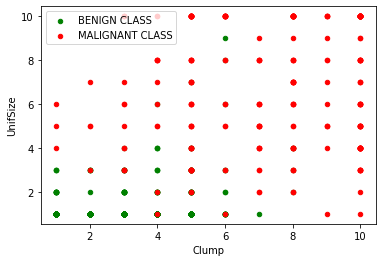

In [8]:
axes = benign.plot(
    kind='scatter',
    x="Clump",
    y="UnifSize",
    color='green',
    label="BENIGN CLASS"
)

malignant.plot(
    kind='scatter',
    x="Clump",
    y="UnifSize",
    color='red',
    label="MALIGNANT CLASS",
    ax=axes
)

## __Corrigiendo datos__

Ahora necesitamos identificar las filas indeseadas. Para poder ver esto, vamos a usar buscarlas como un tipo de dato __Object__.

Los quitaremos porque no podemos representar __operaciones matemáticas__ en datos __no numéricos__ por lo que necesitamos convertirlos a enteros(int).

In [9]:
# Mostramos la estructura de nuestro dataset

print(df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


### __Convirtiendo tipos de datos__

En este caso, BareNuc es un campo de tipo __object__, es decir, un no numérico por lo que vamos a convertirlo a __int__ y posteriormente mostramos los cambios.

In [10]:
# Convertimos los tipos de datos no numéricos en enteros

df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()]
df["BareNuc"] = df["BareNuc"].astype("int64")

# Mostramos los cambios
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### __Mostrando columnas__

In [11]:
# Revisamos las columnas en nuestro dataset

df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

### __Removiendo columnas__

No necesitamos la columna __ID__ porque no se usa el numero de identificación para entrenar nuestro dataset y la columna __Class__ tampoco porque es nuestra variable dependiente.

Para remover las columnas que no queremos, haremos uso del siguiente código:

In [12]:
# Quitamos la columna que no queremo(Class)

feature = df[
    [
        'Clump',    'UnifSize',     'UnifShape',    'MargAdh',  'SingEpiSize',
        'BareNuc',  'BlandChrom',   'NormNucl',     'Mit'
    ]
]

## __Declarando variables__

En este caso:

* X es una variable independiente.

* Y es una variable dependiente.

Mostramos en forma de __array__ los siguientes datos enteros.

In [13]:
# Creamos variables dependientes e independientes

x = np.asarray(feature)         # X es independiente
y = np.asarray(df["Class"])     # y es dependiente

x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

## __Entrenando nuestra data__

Ahora que hemos declarado nuestras variables __X__ y __Y__, vamos a entrenar nuestra data.

* Importamos el módulo __train_test_split__ de la librería __Sklearn__.

* Declarar las variables de __entrenamiento__(train) y __prueba__(test) con sus respectivos ejes.

* Declaramos un 0.3(30%) al tamaño de prueba.

* Imprimimos el siguiente resultado:
    
    - 546 datos son usados para entrenamiento

    - 137 datos son usados para prueba

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=2
)

print("Entrenamiento")
print(x_train.shape)
print()

print("Prueba")
print(x_test.shape)

Entrenamiento
(478, 9)

Prueba
(205, 9)


## __Generando el modelo ROC__

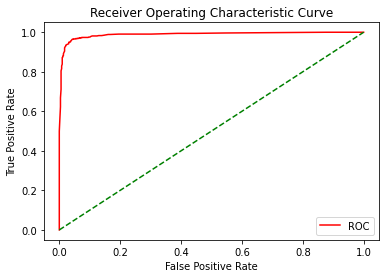

In [30]:
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)

model =RandomForestClassifier()
model.fit(train_X, train_y)

prob = model.predict_proba(test_X)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)

## __Creación de la Support Vector Machine__

Creamos nuestro modelo de SVM usando la librería Scikit-learn. Aquí vamos a usar una SVC(Support Vector Classifier).

Para ello hacemos lo siguiente:

- Importar la librería

- Crear la variable __model__ y asignarle el tipo de clasificador que queremos usar.

- La función SVC contará con los siguientes atributos:

    * Kernel: Clases de algoritmos para patrones de análisis.

    * Parámetros Gamma: Deteminan la distancia a la que una sola muestra de datos influye o se ajusta a la curvatura del límite de decisión.

    * C: Determina la penalización o cuántas muestras se pueden colocar en diferentes clases.

In [20]:
from sklearn import svm

model = svm.SVC(
    kernel='linear',
    gamma="auto",
    C=0.3
)

### __Comparamos los datos actuales con las predicciones__

Imprimimos los datos del modelo y agregamos nuestras variables __x_train__ e __y_test__ y en la parte inferior declaramos la variable __y_predicted__ y usamos la función __predict()__ y agregamos nuestra variable de prueba(x_test).

In [21]:
model.fit(x_train, y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

In [22]:
y_predicted = model.predict(x_test)

## __Evaluando resultados y precisión__

Ahora evaluaremos los resultados, revisaremos la presición y el puntaje f1.

Procedemos a hacer lo siguiente:

* Importar el módulo __classification_report__ de la librería __Sklearn.metrics__.

* Agregamos a los atributos de la clase classification_report() el siguiente atributo:

    - Valor de prueba: y_test

    - Calore predecido: y_predicted


Con esto podemos el siguiente resultado:

- 99% de los pacientes se encuentran en __estado leve__.

- 93% de los pacientes se encuentran en __mal estado__.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           2       0.97      0.93      0.95       125
           4       0.89      0.95      0.92        80

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.93       205
weighted avg       0.94      0.94      0.94       205



### __¿Cómo lo calcula nuestro sistema?__

__True positive__: Verdadero positivo

__False positive__: Falso positivo

__recall__: Recuerdo

- precision = (True positive) / (True positive + False positive) o precision = (True positive) / Total

El __f1 score__ es una media harmónica, esto es:

- f1 score = 2 * (precision * recall) * (precision + recall)

y soporte significa instancia aquí muestra que la clase 2 era positiva y la clase 4 era negativa.

Esto da resultado a que 137 es 83 + 54, el resultado del dataset.